In [119]:
import pickle as p
import networkx as nx
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [24]:
path_result_mat = "./data/OASIS_full_batch/"

In [25]:
def remove_dummy_nodes(graph):
    G = graph.copy()
    to_remove = []
    for (p, d) in G.nodes(data=True):
        if d['is_dummy'] == True:
            to_remove.append(p)
    G.remove_nodes_from(to_remove)
    return G

In [26]:
sing_graph = p.load(open("./data/OASIS_full_batch/modified_graphs/graph_24.gpickle", "rb" ))

In [27]:
is_dummy = []
for i in range(134):
    sing_graph = p.load(open("./data/OASIS_full_batch/modified_graphs/graph_"+str(i)+".gpickle","rb"))
    is_dummy.append(list(nx.get_node_attributes(sing_graph,"is_dummy").values()))
    
is_dummy_vect = [val for sublist in is_dummy for val in sublist]

In [ ]:
np.where(np.array(is_dummy_vect)==True)[0]

In [ ]:
# First select the graph with highest number nodes
max_node = 0
largest_graph = 0
for i in range(134):
    g = p.load(open("./data/OASIS_full_batch/modified_graphs/graph_"+str(i)+".gpickle","rb"))
    g = remove_dummy_nodes(g)
    if len(g.nodes()) > max_node:
        max_node = len(g.nodes())
        largest_graph = g
        print(max_node,i)
        lar_graph_ind = i

In [21]:
x_mSync = sio.loadmat(path_result_mat+"X_mSync.mat")['X']

In [3]:
x_mALS = sio.loadmat(path_result_mat+"X_mALS.mat")['X']

In [4]:
x_mALS[0,:101]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [22]:
matching_matrix = x_mSync
counter = 0
nb_graphs = 134
nb_nodes = int(matching_matrix.shape[0]/nb_graphs)

match_node_value = {k:[] for k in range(nb_graphs)}

#graph_ref_num = lar_graph_ind

for graph_num in range(nb_graphs):
    
    graph_ref_num = p.load(open("./data/OASIS_full_batch/modified_graphs/graph_"+str(graph_num)+".gpickle","rb"))

    rscope = range(graph_num * nb_nodes, (graph_num + 1) * nb_nodes)

    for i in range(nb_graphs-1):
        
        iscope = range(i * nb_nodes, (i+1)*nb_nodes)
        Xri = np.array(matching_matrix[np.ix_(rscope, iscope)], dtype=int)
        
        graph = p.load(open("./data/OASIS_full_batch/modified_graphs/graph_"+str(i)+".gpickle","rb"))
                   
        for j in range(Xri.shape[0]):  
            if graph.nodes[j]['is_dummy'] == False and len(np.where(Xri[j,:]==1)[0])!=0:                
                
                       #if graph_ref_num.nodes[int(np.where(Xri[j,:]==1)[0])]['is_dummy'] == False:
                    
                        if len(np.where(Xri[j,:]==1)[0])>1:
                            
                            counter+=1
                       
                               #match_node_value[int(np.where(Xri[j,:]==1)[0])].append(1)
print(counter)



0


In [56]:
indexes = np.where(matching_matrix[6,:]==1)[0]

In [103]:
matching_matrix = x_mSync
nb_graphs = 134
list_graphs = []
for i in range(nb_graphs):
    match_label_per_graph={}
    
    g = p.load(open("./data/OASIS_full_batch/modified_graphs/graph_"+str(i)+".gpickle","rb"))
    nb_nodes = len(g.nodes)
    scope = range(i * nb_nodes, (i + 1) * nb_nodes)
    for node_indx,ind in enumerate(scope):
        match_indexes = np.where(matching_matrix[ind,:]==1)[0]
        match_perc = (len(match_indexes) - len(set(match_indexes).intersection(np.where(np.array(is_dummy_vect)==True)[0])))/nb_graphs
        match_label_per_graph[node_indx] = {'label_color':match_perc}
        
    nx.set_node_attributes(g, match_label_per_graph)
    list_graphs.append(g)
        

In [111]:
len(list(nx.get_node_attributes(list_graphs[0],'label_color').values()))

101

In [116]:

match_list = list(nx.get_node_attributes(remove_dummy_nodes(list_graphs[0]),'label_color').values())

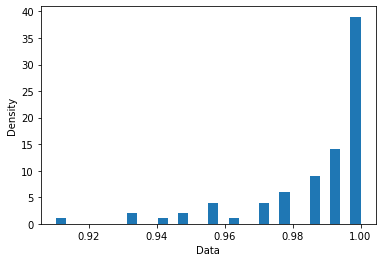

In [139]:
plt.hist(match_list, density=False, bins=30)  # density=False would make counts
plt.ylabel('Density')
plt.xlabel('Data');

In [80]:
match_indexes = np.where(matching_matrix[0,:]==1)[0]
(len(match_indexes) - len(set(match_indexes).intersection(np.where(np.array(is_dummy_vect)==True)[0])))/134

0.9104477611940298

In [75]:
match_indexes

134

In [67]:
rscope = range(graph_num * nb_nodes, (graph_num + 1) * nb_nodes)

In [57]:
set(indexes).intersection(np.where(np.array(is_dummy_vect)==True)[0])

{788, 8363, 10794}

In [47]:
np.where(np.array(is_dummy_vect)==True)[0]

array([   83,    84,    85, ..., 13531, 13532, 13533])

array([False, False, False, ...,  True,  True,  True])

In [ ]:
len(np.where(Xri[j,:]==1)[0])

In [ ]:
np.ix_(range(0,10),range(0,10))

In [ ]:
graph.nodes[int(np.where(Xri[1,:]==1)[0])]['is_dummy']

In [ ]:
int(np.where(Xri[5,:]==1)[0])

In [ ]:
Xri

In [ ]:
# g = sing_graph

In [ ]:
perm_mat_1 = ground_truth[1][2]
perm_mat_2 = ground_truth[2][1]

result_perm = np.zeros((perm_mat_1.shape[0],), dtype=int)

for node_reference, node_noisy_1 in enumerate(perm_mat_1):
    # get the corresponding node in the second graph
    node_noisy_2 = perm_mat_2[node_reference]

    # Fill the result
    result_perm[node_noisy_1] = node_noisy_2

result_perm

In [ ]:
perm_mat_1

In [ ]:
perm_mat_2

In [ ]:
result_perm

In [ ]:
import scipy.io as sio

In [ ]:
affi_0_1 = sio.loadmat('affinity_0_1.mat')

In [ ]:
affi_0_1['kE12'].shape

In [ ]:
#affi_0_1

In [ ]:
per_mat = np.load("noise_1000,outliers_0/ground_truth.npy")

In [ ]:
per_mat[0][2]

In [ ]:
per_mat[2][0]

In [ ]:
e = np.array(list(range(0, 0, 5)))

In [ ]:
e

In [ ]:
g = nx.read_gpickle("graph_25.gpickle")

In [ ]:
len(g.nodes())

In [ ]:
g.nodes()